In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
import os 
#os.listdir(os.getcwd())

RES_DIR = './train_analysis/'

In [72]:
test_res_file = RES_DIR + './submission_Double_ZoomOut_Padding_RandomRotate_CellBased_0.5_Binary_RGB.csv'
valid_res_file = RES_DIR + './valid_result_Double_ZoomOut_Padding_RandomRotate_CellBased_0.5_Binary_RGB.csv'
train_res_file = RES_DIR + './train_result_Double_ZoomOut_Padding_RandomRotate_CellBased_0.5_Binary_RGB.csv'
threshold=0.1

In [73]:
test_df = pd.read_csv(test_res_file)
    
test_df.head()

,name,gt,positive
0,./datasets/classify/LSIL_IMG052x017.png_output/crops/90.png,0,0.001759
1,./datasets/classify/LSIL_IMG051x011.png_output/crops/74.png,0,0.000414
2,./datasets/classify/LSIL_IMG051x019.png_output/crops/43.png,0,0.031830
3,datasets/classify/LSIL_IMG052x022.png_output/crops/95.png,0,0.001617
4,./datasets/classify/LSIL_IMG051x023.png_output/crops/16.png,0,0.000773


In [74]:
test_df['folder'] = test_df['name'].apply(lambda x: x.split('/')[-3])
test_df.head()

,name,gt,positive,folder
0,./datasets/classify/LSIL_IMG052x017.png_output/crops/90.png,0,0.001759,LSIL_IMG052x017.png_output
1,./datasets/classify/LSIL_IMG051x011.png_output/crops/74.png,0,0.000414,LSIL_IMG051x011.png_output
2,./datasets/classify/LSIL_IMG051x019.png_output/crops/43.png,0,0.031830,LSIL_IMG051x019.png_output
3,datasets/classify/LSIL_IMG052x022.png_output/crops/95.png,0,0.001617,LSIL_IMG052x022.png_output
4,./datasets/classify/LSIL_IMG051x023.png_output/crops/16.png,0,0.000773,LSIL_IMG051x023.png_output


In [75]:
#test_df['folder'].unique()

In [76]:
def get_fov_type(folder):
    splits = folder.split('_')[:2]
    #print(splits)
    if splits[0]=='LSIL':
        if splits[1]=='HPV':
            return 3
        else:
            return 1
    elif splits[0]=='HSIL':
        return 2
    elif splits[0]=='NILM':
        return 4
    elif splits[0]=='SCC':
        return 5
    return 0

In [77]:
#[get_fov_type(folder) for folder in test_df['folder'].unique()]

In [78]:
test_df['fov_type'] = test_df['folder'].apply(get_fov_type)

In [79]:
test_df['gt'] = np.where(test_df['gt'].values>0,1,0)
test_df['pred'] = np.where(test_df['positive'].values>threshold,1,0)

In [80]:
def pred_type(series):
    if (series['gt']==1)&(series['pred']==1):
        return 'TP'
    if (series['gt']==1)&(series['pred']==0):
        return 'FN'
    if (series['gt']==0)&(series['pred']==0):
        return 'TN'
    if (series['gt']==0)&(series['pred']==1):
        return 'FP'


In [81]:
test_df['pred_type'] = test_df.apply(pred_type,axis=1)

In [82]:
test_df[['fov_type','pred_type','pred']].groupby(['fov_type','pred_type']).count()

pred
fov_type pred_type      
1        FN         6   
         FP         39  
         TN         1406
         TP         29  
2        FN         2   
         TP         40  
3        FN         5   
         FP         94  
         TN         183 
         TP         21  
5        FN         4   
         TP         78

In [83]:
#test_df[['folder','pred','pred_type']].groupby(['folder','pred_type']).count()

In [84]:
fn_df = test_df.loc[test_df['pred_type']=='FN']
fn_df

,name,gt,positive,folder,fov_type,pred,pred_type
236,./datasets/classify/LSIL_IMG050x022.png_output/crops/116.png,1,0.060772,LSIL_IMG050x022.png_output,1,0,FN
253,./datasets/classify/SCC_IMG041x015.png_output/crops/44.png,1,0.006512,SCC_IMG041x015.png_output,5,0,FN
306,datasets/classify/SCC_IMG042x006.png_output/crops/125.png,1,0.098549,SCC_IMG042x006.png_output,5,0,FN
315,./datasets/classify/HSIL_IMG039x012.png_output/crops/57.png,1,0.013699,HSIL_IMG039x012.png_output,2,0,FN
371,./datasets/classify/LSIL_HPV_IMG040x022.png_output/crops/8.png,1,0.091659,LSIL_HPV_IMG040x022.png_output,3,0,FN
579,./datasets/classify/HSIL_IMG041x003.png_output/crops/33.png,1,0.068525,HSIL_IMG041x003.png_output,2,0,FN
677,./datasets/classify/LSIL_IMG050x019.png_output/crops/3.png,1,0.029054,LSIL_IMG050x019.png_output,1,0,FN
767,./datasets/classify/LSIL_HPV_IMG042x011.png_output/crops/60.png,1,0.075551,LSIL_HPV_IMG042x011.png_output,3,0,FN
922,./datasets/classify/LSIL_HPV_IMG040x022.png_output/crops/11.png,1,0.073844,LSIL_HPV_IMG040x022.png_output,3,0,FN
965,./datasets/classify/LSIL_IMG050x018.png_output/crops/64.png,1,0.041136,LSIL_IMG050x018.png_output,1,0,FN


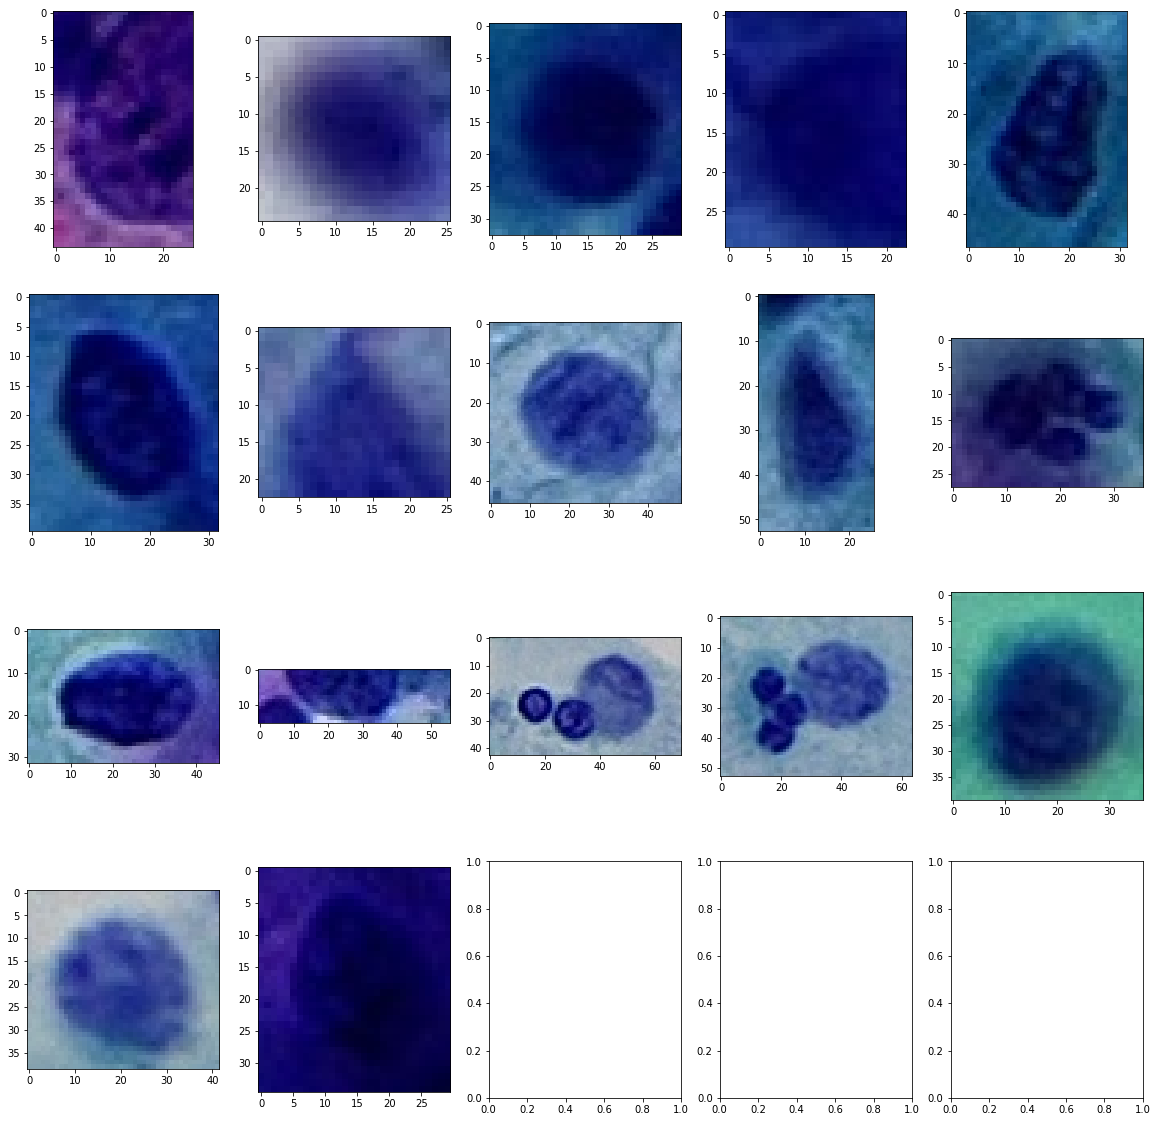

In [85]:
fig, axs = plt.subplots(nrows=len(fn_df)//5+1, ncols=5, constrained_layout=False,figsize=(20,20))
for i,ax in enumerate(axs.flatten()):
    if i<len(fn_df):
        img = cv2.imread(fn_df['name'].iloc[i])
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        ax.imshow(img)

In [86]:
fp_df = test_df.loc[test_df['pred_type']=='FP']
fp_df

,name,gt,positive,folder,fov_type,pred,pred_type
11,./datasets/classify/LSIL_HPV_IMG040x010.png_output/crops/11.png,0,0.363517,LSIL_HPV_IMG040x010.png_output,3,1,FP
17,datasets/classify/LSIL_IMG051x009.png_output/crops/49.png,0,0.105496,LSIL_IMG051x009.png_output,1,1,FP
19,./datasets/classify/LSIL_HPV_IMG041x004.png_output/crops/21.png,0,0.497095,LSIL_HPV_IMG041x004.png_output,3,1,FP
26,datasets/classify/LSIL_HPV_IMG040x005.png_output/crops/23.png,0,0.167027,LSIL_HPV_IMG040x005.png_output,3,1,FP
58,./datasets/classify/LSIL_HPV_IMG039x018.png_output/crops/12.png,0,0.186699,LSIL_HPV_IMG039x018.png_output,3,1,FP
64,./datasets/classify/LSIL_HPV_IMG039x014.png_output/crops/6.png,0,0.450135,LSIL_HPV_IMG039x014.png_output,3,1,FP
98,datasets/classify/LSIL_HPV_IMG042x027.png_output/crops/54.png,0,0.210377,LSIL_HPV_IMG042x027.png_output,3,1,FP
115,datasets/classify/LSIL_HPV_IMG042x027.png_output/crops/43.png,0,0.142600,LSIL_HPV_IMG042x027.png_output,3,1,FP
119,datasets/classify/LSIL_HPV_IMG042x015.png_output/crops/34.png,0,0.970576,LSIL_HPV_IMG042x015.png_output,3,1,FP
121,./datasets/classify/LSIL_HPV_IMG042x017.png_output/crops/24.png,0,0.110520,LSIL_HPV_IMG042x017.png_output,3,1,FP


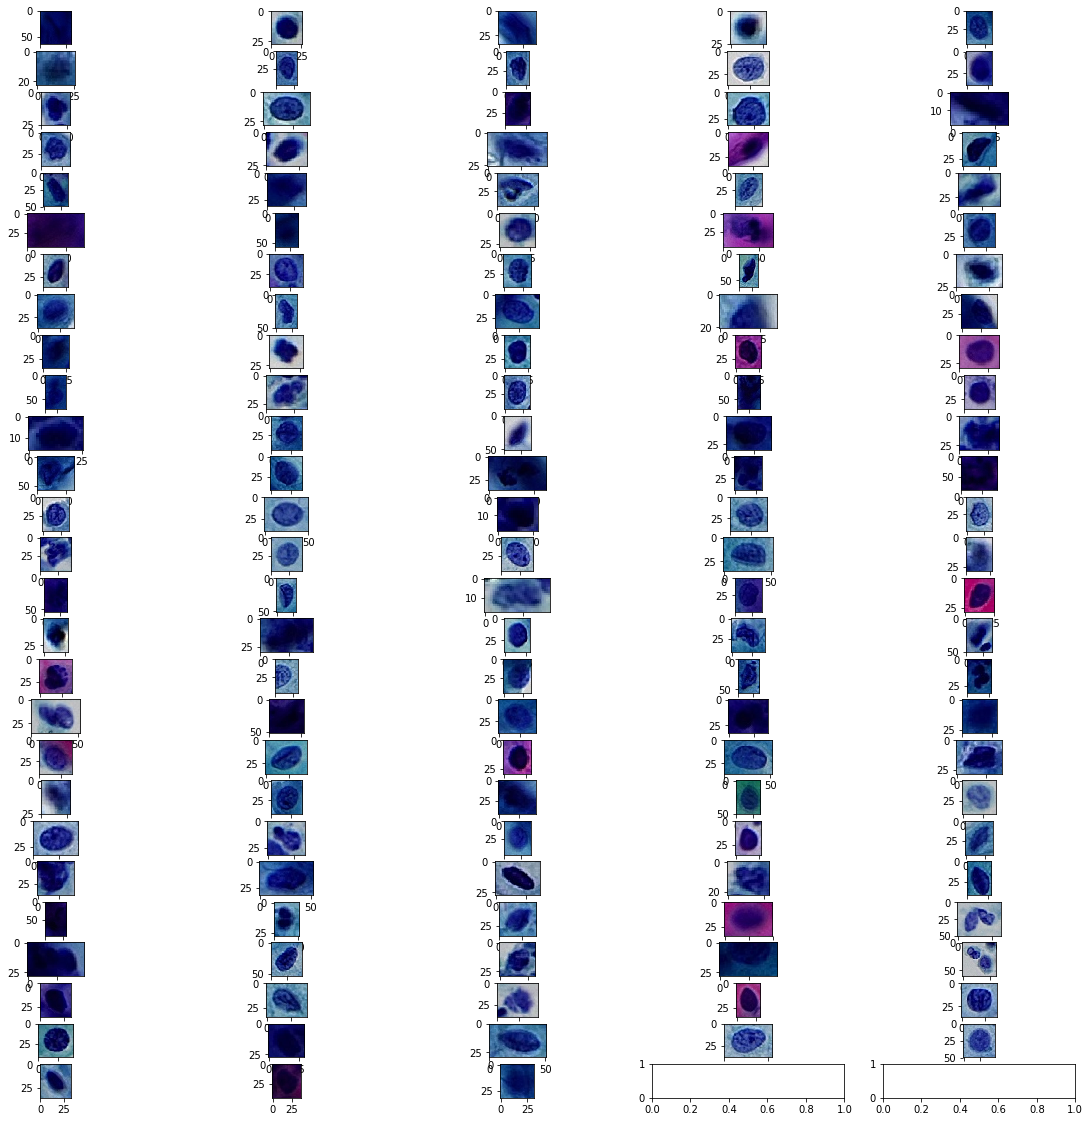

In [87]:
fig, axs = plt.subplots(nrows=len(fp_df)//5+1, ncols=5, constrained_layout=False,figsize=(20,20))
for i,ax in enumerate(axs.flatten()):
    if i<len(fp_df):
        img = cv2.imread(fp_df['name'].iloc[i])
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        ax.imshow(img)

In [88]:
 train_set = pd.read_csv('input/train_labels.csv')

In [89]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,confusion_matrix
from itertools import product

In [90]:
trn_res_df = pd.read_csv(train_res_file)
val_res_df = pd.read_csv(valid_res_file)

In [91]:
for i in range(5):
    tmp_df = trn_res_df.loc[trn_res_df['folder']==i+1]
    tmp2_df = val_res_df.loc[val_res_df['folder']==i+1]
    gt = tmp_df['gt']
    preds = tmp_df['preds']
    gt2 = tmp2_df['gt']
    preds2 = tmp2_df['preds']
    print('-----------------')
    print('Current folder: %d'%(i+1))
    print('Train Accuracy :{}'.format(accuracy_score(gt,preds>=threshold)))
    print('Valid Accuracy :{}'.format(accuracy_score(gt2,preds2>=threshold)))
    print('Train recall :{}'.format(recall_score(gt,preds>=threshold)))
    print('Valid recall :{}'.format(recall_score(gt2,preds2>=threshold)))
    print('Train precision :{}'.format(precision_score(gt,preds>=threshold)))
    print('Valid precision :{}'.format(precision_score(gt2,preds2>=threshold)))
    print('Train F1 :{}'.format(f1_score(gt,preds>=threshold)))
    print('Valid F1 :{}'.format(f1_score(gt2,preds2>=threshold)))
    

-----------------
Current folder: 1
Train Accuracy :0.9332021301227136
Valid Accuracy :0.9223300970873787
Train recall :0.9520383693045563
Valid recall :0.8815165876777251
Train precision :0.5965439519158527
Valid precision :0.5653495440729484
Train F1 :0.733487297921478
Valid F1 :0.6888888888888889
-----------------
Current folder: 2
Train Accuracy :0.9331018518518519
Valid Accuracy :0.9379916705229061
Train recall :0.9389221556886228
Valid recall :0.9476190476190476
Train precision :0.5980167810831426
Valid precision :0.6180124223602484
Train F1 :0.7306616961789375
Valid F1 :0.7481203007518796
-----------------
Current folder: 3
Train Accuracy :0.9360027774563129
Valid Accuracy :0.9347222222222222
Train recall :0.9473684210526315
Valid recall :0.9330143540669856
Train precision :0.6087624903920061
Valid precision :0.6055900621118012
Train F1 :0.7412260177819373
Valid F1 :0.7344632768361582
-----------------
Current folder: 4
Train Accuracy :0.937051608423976
Valid Accuracy :0.9383974

In [92]:
gt = val_res_df['gt']
preds = val_res_df['preds']
print('-----------------')
print('Total Valid Set')
print('Valid Accuracy :{}'.format(accuracy_score(gt,preds>=threshold)))
print('Valid recall :{}'.format(recall_score(gt,preds>=threshold)))
print('Valid precision :{}'.format(precision_score(gt,preds>=threshold)))
print('Valid F1 :{}'.format(f1_score(gt,preds>=threshold)))

-----------------
Total Valid Set
Valid Accuracy :0.9343579298213128
Valid recall :0.9282296650717703
Valid precision :0.6047381546134664
Valid F1 :0.7323518308795771


In [93]:
gt = test_df['gt'].values
gt = np.where(gt>0,1,0)

pred = test_df['positive'].values
pred_bin = np.where(pred>threshold,1,0)

print("AUC Score:",roc_auc_score(gt,pred))
print("Accuracy:",accuracy_score(gt,pred_bin))
print("Recall:", recall_score(gt,pred_bin))
print("Precision:", precision_score(gt,pred_bin))
print("F1 Score:", f1_score(gt,pred_bin))

AUC Score: 0.977970304799573
Accuracy: 0.9213424226533823
Recall: 0.9081081081081082
Precision: 0.5581395348837209
F1 Score: 0.691358024691358


In [94]:
def Scores(df,threshold):
    gt = df['gt'].values
    gt = np.where(gt>0,1,0)

    try:
        pred = df['positive'].values
    except:
        pred = df['preds'].values
        
    pred_bin = np.where(pred>threshold,1,0)
    
    return precision_score(gt,pred_bin),recall_score(gt,pred_bin),\
            accuracy_score(gt,pred_bin),roc_auc_score(gt,pred)

# Binary Class Result analysis

In [112]:
MODELS = ['Double_ZoomOut_Padding_RandomRotate_CellBased_0.5',
          'Double_ZoomOut_Padding_Minority_CellBased_0.5',
          'Double_ZoomOut_Padding_Majority_Down_Minority_Up_CellBased_0.5']
THRESHOLDS = np.arange(0.5,1,0.1)
COLOR_MODE = 'RGB'
DATASETS = {'TrainSet':"train_result_{}_Binary_{}.csv",
            'ValidSet':"valid_result_{}_Binary_{}.csv",
            'TestSet':"submission_{}_Binary_{}.csv"}

columns = ['DataSet','Model','Threshold','Precision','Recall','Accuracy','ROC_AUC']
table = pd.DataFrame(columns=columns)
for dataset,model in product(DATASETS.keys(),MODELS):
    df = pd.read_csv(RES_DIR+DATASETS[dataset].format(model, COLOR_MODE))
    temp = [dataset,model]
    for threshold in THRESHOLDS:
        data = temp.copy()
        data.append(threshold)
        scores = Scores(df,threshold)
        data += scores
        table = table.append(dict(zip(columns,data)),ignore_index=True)
        
#table.head()
        
    



In [113]:
table

,DataSet,Model,Threshold,Precision,Recall,Accuracy,ROC_AUC
0,TrainSet,Double_ZoomOut_Padding_RandomRotate_CellBased_0.5,0.5,0.860395,0.728584,0.974312,0.981800
1,TrainSet,Double_ZoomOut_Padding_RandomRotate_CellBased_0.5,0.6,0.894391,0.680754,0.973653,0.981800
2,TrainSet,Double_ZoomOut_Padding_RandomRotate_CellBased_0.5,0.7,0.918443,0.633495,0.972128,0.981800
3,TrainSet,Double_ZoomOut_Padding_RandomRotate_CellBased_0.5,0.8,0.942085,0.557396,0.968561,0.981800
4,TrainSet,Double_ZoomOut_Padding_RandomRotate_CellBased_0.5,0.9,0.966256,0.425186,0.961124,0.981800
5,TrainSet,Double_ZoomOut_Padding_Minority_CellBased_0.5,0.5,0.979800,0.979097,0.981039,0.997385
6,TrainSet,Double_ZoomOut_Padding_Minority_CellBased_0.5,0.6,0.984049,0.975927,0.981591,0.997385
7,TrainSet,Double_ZoomOut_Padding_Minority_CellBased_0.5,0.7,0.987958,0.971591,0.981425,0.997385
8,TrainSet,Double_ZoomOut_Padding_Minority_CellBased_0.5,0.8,0.991492,0.961842,0.978582,0.997385
9,TrainSet,Double_ZoomOut_Padding_Minority_CellBased_0.5,0.9,0.994370,0.945365,0.972317,0.997385


In [103]:
table.loc[(table['DataSet']=='TestSet') & (table['Model']=='Double_ZoomOut_Padding_RandomRotate_CellBased_0.5')]

,DataSet,Model,Threshold,Precision,Recall,Accuracy,ROC_AUC
30,TestSet,Double_ZoomOut_Padding_RandomRotate_CellBased_0.5,0.5,0.805447,0.669903,0.967577,0.965924
31,TestSet,Double_ZoomOut_Padding_RandomRotate_CellBased_0.5,0.6,0.857143,0.621359,0.968217,0.965924
32,TestSet,Double_ZoomOut_Padding_RandomRotate_CellBased_0.5,0.7,0.891192,0.556634,0.966297,0.965924
33,TestSet,Double_ZoomOut_Padding_RandomRotate_CellBased_0.5,0.8,0.937888,0.488673,0.964164,0.965924
34,TestSet,Double_ZoomOut_Padding_RandomRotate_CellBased_0.5,0.9,0.965812,0.365696,0.957338,0.965924


In [29]:
#table.loc[table['Model']=='Double_ZoomOut_Padding_RandomRotate_0.5'].sort_values(['Precision','Recall'])
#table.loc[table['Model']=='Double_ZoomOut_Padding_RandomRotate_0.5']

In [102]:
table.to_csv('./Binary.csv',index=False)

In [31]:
CLASS = ['Norm', 'LSIL', 'HSIL', 'LSIL_HPV', 'SCC']
multi_test_df = pd.read_csv('./train_analysis/submission_Double_ZoomOut_Padding_Majority_Down_Minority_Up_CellBased_0.5_MultiClass.csv')

In [33]:
#multi_test_df.loc[multi_test_df['gt'] == 5]

In [34]:
gt_cat = multi_test_df['gt'].copy()
preds_cat = np.argmax(multi_test_df.loc[:, 'positive_0':'positive_4'].values,axis=1)
gt_cat[gt_cat == 5] = 4

In [35]:
c_matrix = confusion_matrix(gt_cat, preds_cat)

In [36]:
import plotly.offline as py
import plotly.graph_objs as go
from plotly import tools

py.init_notebook_mode(connected=True)
from itertools import product

In [37]:
def visual_cmatrix(c_matrix, clazz=CLASS):
    trace = go.Heatmap(z=c_matrix,
                       x=clazz,
                       y=clazz
                       )

    layout = {'annotations':
              [
                {
                    "x": t[0],
                    "y": t[1],
                    "font": {"color":"white"},
                    "showarrow": False,
                    "text": str(c_matrix.T.flatten()[n]),
                    "xref": "x1",
                    "yref": "y1"
                } 
               for n, t in enumerate(product(clazz, clazz))
              ],
              'title': "Confusion Matrix",
              'xaxis': {"title": "Predicted Value"},
              'yaxis': {"title": "Real Value"}
             }

    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)

In [38]:
CLASS = ['Norm', 'LSIL', 'HSIL', 'LSIL_HPV', 'SCC']
for i in [1,2,3,4]:
    print("Class {}: Accuracy: {}".format(CLASS[i], accuracy_score(gt_cat == i,preds_cat == i)))
    print("Class {}: Precision: {}".format(CLASS[i], precision_score(gt_cat == i,preds_cat == i)))
    print("Class {}: Recall: {}".format(CLASS[i], recall_score(gt_cat == i,preds_cat == i)))

Class LSIL: Accuracy: 0.978772674642995
Class LSIL: Precision: 0.2222222222222222
Class LSIL: Recall: 0.3333333333333333
Class HSIL: Accuracy: 0.9930528753377075
Class HSIL: Precision: 0.7777777777777778
Class HSIL: Recall: 0.7368421052631579
Class LSIL_HPV: Accuracy: 0.9880355075260517
Class LSIL_HPV: Precision: 0.4444444444444444
Class LSIL_HPV: Recall: 0.42857142857142855
Class SCC: Accuracy: 0.9922809725974527
Class SCC: Precision: 0.6666666666666666
Class SCC: Recall: 0.6666666666666666


In [39]:
print(c_matrix)

[[2412   28    6   11    8]
 [  15   10    2    3    0]
 [   6    1   28    1    2]
 [  14    2    0   12    0]
 [   6    4    0    0   20]]


In [126]:
PADDING = "Double_ZoomOut_Padding" #{Double_ZoomOut_Padding, Padding, Warp}
FOLD_MODE = "CellBased" #{CellBased, FovBased}
DROPOUT = 0.5
CLF_MODE = "MultiClass" #{MultiClass, Binary}
COLOR_MODE = "RGB"
#COLOR_MODE = ['HSV_CLAHE_V', 'HSV_CLAHE_S', 'HSV_CLAHE_SV', 'LAB_CLAHE_L', 'RGB',"HIST_BATCH_EQ"] 
#{HSV_CLAHE_V, HSV_CLAHE_S, HSV_CLAHE_SV, LAB_CLAHE_L, RGB}
AUG_MODE = ['Minority', 'RandomRotate', 'Majority_Down_Minority_Up', 'Majority_Down']
#AUG_MODE = 'RandomRotate'

MODELS = ['{}_{}_{}_{}_{}_{}'.format(PADDING, aug_mode, FOLD_MODE, DROPOUT, CLF_MODE, COLOR_MODE) 
             for aug_mode in AUG_MODE]

#MODELS = ['{}_{}_{}_{}_{}_{}'.format(PADDING, AUG_MODE, FOLD_MODE, DROPOUT, CLF_MODE, color_mode) 
#             for color_mode in COLOR_MODE]

DATASETS = {'TrainSet':"train_result_{}.csv",
            'ValidSet':"valid_result_{}.csv",
            'TestSet':"submission_{}.csv"}

#columns = ['DataSet', 'Model'] + list(product(CLASS, ['Precision', 'Recall', 'Accuracy']))
columns = [(' ', 'DataSet'), (' ', 'Model'), (' ', 'accuracy')] + \
          [(' ', 'b_accuracy'), (' ', 'b_precision'), (' ', 'b_recall')] + \
          list(product(CLASS, ['Precision', 'Recall']))
columns = pd.MultiIndex.from_tuples(columns)
table_multiclass = pd.DataFrame(columns=columns)

c_matrixes = []
for dataset, model in product(DATASETS.keys(), MODELS):
    df = pd.read_csv(RES_DIR + DATASETS[dataset].format(model))
    gt_cat = df['gt'].copy()
    try:
        preds_cat = np.argmax(df.loc[:, 'preds_0':'preds_4'].values, axis=1)
    except:
        preds_cat = np.argmax(df.loc[:, 'positive_0':'positive_4'].values, axis=1)
    gt_cat[gt_cat == 5] = 4
    accuracy = accuracy_score(gt_cat, preds_cat)
    
    gt_b = (gt_cat > 0).astype(np.uint8)
    preds_b = (preds_cat > 0).astype(np.uint8)
    b_accuracy = accuracy_score(gt_b, preds_b)
    b_precision = precision_score(gt_b, preds_b)
    b_recall = recall_score(gt_b, preds_b)
    
    temp = [dataset, model, accuracy] + [b_accuracy, b_precision, b_recall]
    for clazz in range(len(CLASS)):
        precision = precision_score(gt_cat == clazz, preds_cat == clazz)
        recall = recall_score(gt_cat == clazz, preds_cat == clazz)
        #accuracy = accuracy_score(gt_cat == clazz, preds_cat == clazz)
        temp += [precision, recall]
        
    c_matrix = confusion_matrix(gt_cat, preds_cat)    
    c_matrixes.append(c_matrix)      
    table_multiclass = table_multiclass.append(dict(zip(columns, temp)), ignore_index=True)

In [127]:
pd.set_option('display.max_colwidth', -1)
table_multiclass

\
     DataSet   
0   TrainSet   
1   TrainSet   
2   TrainSet   
3   TrainSet   
4   ValidSet   
5   ValidSet   
6   ValidSet   
7   ValidSet   
8   TestSet    
9   TestSet    
10  TestSet    
11  TestSet    

                                                                                   \
                                                                            Model   
0   Double_ZoomOut_Padding_Minority_CellBased_0.5_MultiClass_RGB                    
1   Double_ZoomOut_Padding_RandomRotate_CellBased_0.5_MultiClass_RGB                
2   Double_ZoomOut_Padding_Majority_Down_Minority_Up_CellBased_0.5_MultiClass_RGB   
3   Double_ZoomOut_Padding_Majority_Down_CellBased_0.5_MultiClass_RGB               
4   Double_ZoomOut_Padding_Minority_CellBased_0.5_MultiClass_RGB                    
5   Double_ZoomOut_Padding_RandomRotate_CellBased_0.5_MultiClass_RGB                
6   Double_ZoomOut_Padding_Majority_Down_Minority_Up_CellBased_0.5_MultiClass_RGB   
7   Double_ZoomOut_Padding_Majority_Down_CellBased_0.5_MultiClass_RGB               
8   Double_ZoomOut_Padding_Minority_CellBased_0.5_MultiClass_RGB                    
9   Double_ZoomOut_Padding_RandomRotate_CellBased_0.5_MultiClass_RGB                
10  Double_ZoomOut_Padding_Majority_Down_Minority_Up_CellBased_0.5_MultiClass_RGB   
11  Double_ZoomOut_Padding_Majority_Down_CellBased_0.5_MultiClass_RGB               

                                                   Norm                LSIL  \
    accuracy b_accuracy b_precision  b_recall Precision    Recall Precision   
0   0.967288  0.976897   0.969963    0.965894  0.980788  0.983110  0.931876   
1   0.968918  0.974670   0.901658    0.691176  0.978556  0.994679  0.780899   
2   0.948801  0.967236   0.957880    0.930801  0.971041  0.982667  0.867981   
3   0.958565  0.968809   0.924061    0.814820  0.974288  0.990547  0.799838   
4   0.979743  0.981061   0.796860    0.956596  0.996893  0.982788  0.684848   
5   0.968485  0.974284   0.896731    0.689320  0.978424  0.994397  0.760181   
6   0.959148  0.965398   0.731884    0.749857  0.982314  0.980611  0.525126   
7   0.973041  0.978463   0.854054    0.812107  0.986784  0.990205  0.713450   
8   0.946246  0.953285   0.609756    0.809061  0.986209  0.963462  0.401961   
9   0.959684  0.968857   0.872146    0.618123  0.973596  0.993606  0.800000   
10  0.947312  0.956271   0.654762    0.711974  0.979550  0.973510  0.421053   
11  0.949445  0.960538   0.750000    0.601942  0.972297  0.985842  0.444444   

                  HSIL            LSIL_HPV                 SCC            
      Recall Precision    Recall Precision    Recall Precision    Recall  
0   0.927930  0.954245  0.941745  0.889446  0.876714  0.967799  0.974176  
1   0.470867  0.752924  0.603044  0.733096  0.332258  0.821106  0.811240  
2   0.844851  0.883862  0.880757  0.845803  0.747581  0.936090  0.932946  
3   0.668699  0.823529  0.713115  0.768279  0.550806  0.869852  0.867829  
4   0.918699  0.853503  0.941452  0.623853  0.877419  0.895714  0.972093  
5   0.455285  0.766272  0.606557  0.742857  0.335484  0.806801  0.809302  
6   0.566396  0.690476  0.679157  0.439655  0.493548  0.788217  0.767442  
7   0.661247  0.760000  0.711944  0.715481  0.551613  0.817251  0.866667  
8   0.630769  0.615385  0.746667  0.265060  0.400000  0.731343  0.859649  
9   0.307692  0.521127  0.493333  0.700000  0.254545  0.747573  0.675439  
10  0.492308  0.597222  0.573333  0.323944  0.418182  0.683761  0.701754  
11  0.307692  0.444444  0.426667  0.483871  0.272727  0.670000  0.587719

In [128]:
table_multiclass.to_csv('./multicalss.csv')

In [129]:
visual_cmatrix(c_matrixes[-2])

In [130]:
print(c_matrixes[0])

[[97556   578   242   618   238]
 [  630 10957    60   148    13]
 [  270    28 12868   218   280]
 [  685   149   251  8697   138]
 [  326    46    64    97 20107]]


In [131]:
def visual_mis_classified(true_class, pred_class, df):
    if type(true_class) == str:
        true_class = CLASS.index(true_class)
    if type(pred_class) == str:
        pred_class = CLASS.index(pred_class)
    #gt == 5 must change to 4 
    
    try:
        preds_cat = np.argmax(df.loc[:, 'preds_0':'preds_4'].values, axis=1)
    except:
        preds_cat = np.argmax(df.loc[:, 'positive_0':'positive_4'].values, axis=1)
   
    file_names = df.loc[(df['gt'] == true_class) & (preds_cat == pred_class), 'name']
    
    fig, axs = plt.subplots(nrows=len(file_names)//5+1, ncols=5, constrained_layout=False,figsize=(20,20))
    for i,ax in enumerate(axs.flatten()):
        if i<len(file_names):
            img = cv2.imread(file_names.iloc[i])
            img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            ax.imshow(img)
    return list(file_names)

In [132]:
MODELS[0]
DATASETS['TestSet']

'submission_{}.csv'

In [133]:
_df = pd.read_csv(RES_DIR + DATASETS['TestSet'].format(MODELS[0]))
_df.loc[_df['gt']==5,'gt'] = 4

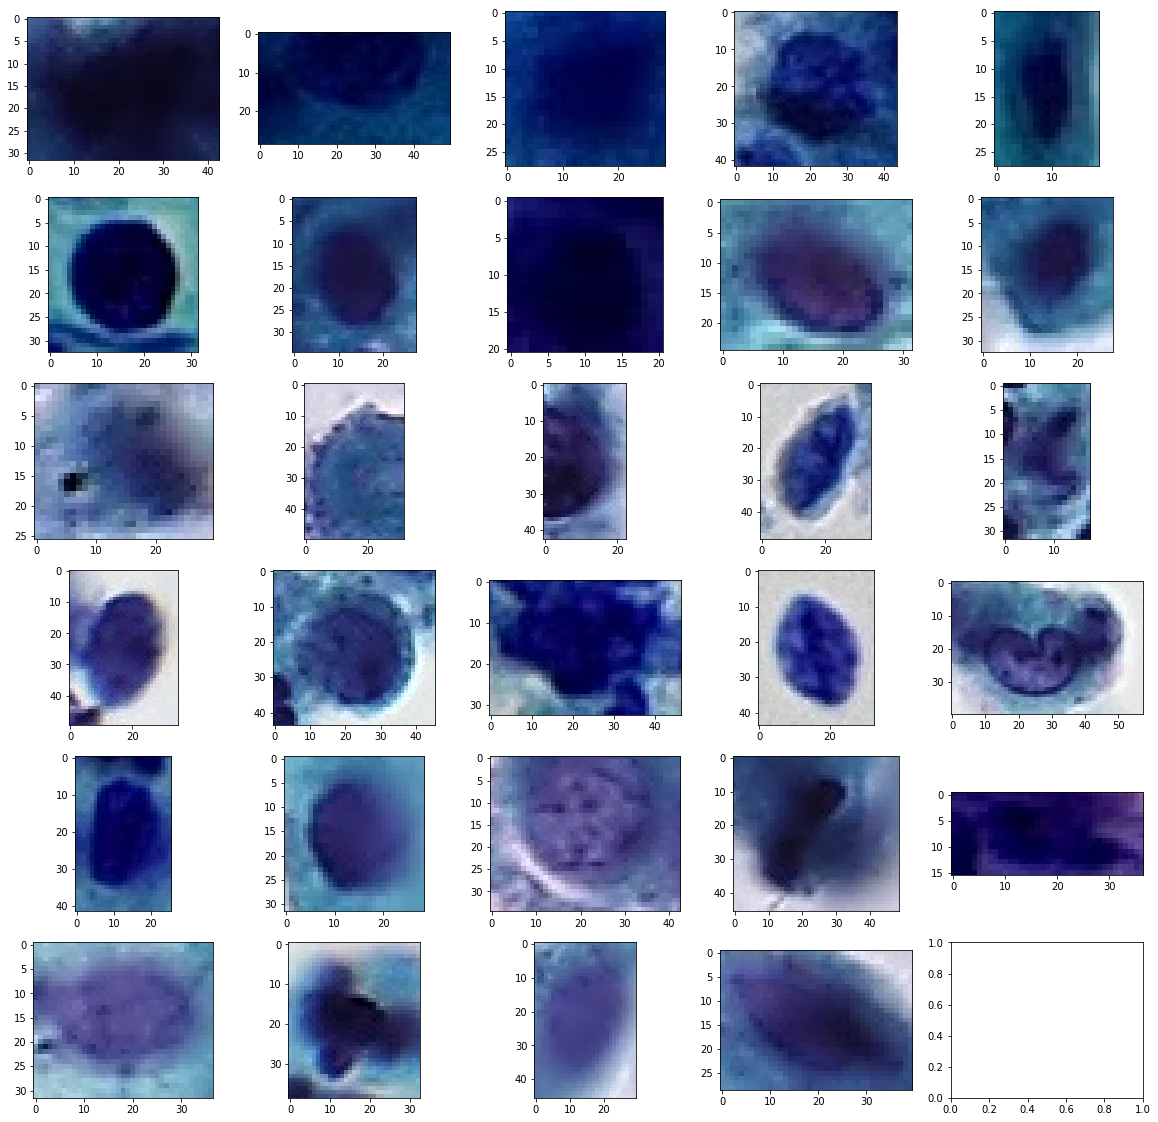

In [135]:
file_name = visual_mis_classified('Norm', 'SCC', _df)

In [136]:
print(file_name)

['datasets/classify_nodenoise_2018/LSIL_HPV_IMG002x006.png_output/crops/54.png', './datasets/classify_nodenoise_2019/LSIL_HPV_IMG040x021.png_output/crops/25.png', './datasets/classify_nodenoise_2019/LSIL_HPV_IMG042x005.png_output/crops/5.png', 'datasets/classify_nodenoise_2019/LSIL_HPV_IMG040x020.png_output/crops/26.png', './datasets/classify_nodenoise_2019/LSIL_IMG051x016.png_output/crops/53.png', './datasets/classify_nodenoise_2019/LSIL_IMG052x009.png_output/crops/104.png', './datasets/classify_nodenoise_2018/LSIL_IMG038x005.png_output/crops/48.png', './datasets/classify_nodenoise_2019/LSIL_IMG051x019.png_output/crops/1.png', './datasets/classify_nodenoise_2018/LSIL_HPV_IMG037x013.png_output/crops/29.png', './datasets/classify_nodenoise_2018/LSIL_IMG036x009.png_output/crops/57.png', './datasets/classify_nodenoise_2018/LSIL_IMG005x017.png_output/crops/84.png', './datasets/classify_nodenoise_2018/LSIL_IMG038x020.png_output/crops/86.png', './datasets/classify_nodenoise_2018/LSIL_IMG036x

In [137]:
import glob

## Mark misslabeled Test Set

In [141]:
import pdb

In [150]:
ORI_ROOT = '../../../'


# ORIG_PATH = {batch: [Path]}
ORI_PATH = {'2018': ['../../../datasets/origin_train/origin_10_1_train/', 
                    ORI_ROOT + './datasets/origin_train/origin_12_06/'], 
            '2019': [ORI_ROOT + './datasets/origin_train/origin_01_15/']}
W_PATH = './miss_labeled_cells'

# prepares data
miss_label_df = pd.read_csv(RES_DIR + DATASETS['TestSet'].format(MODELS[1]))
#print(miss_label_df)
miss_label_df.loc[miss_label_df['gt'] == 5, 'gt'] = 4 # correct the gt 5 to 4 for NILM are considered normal
try:
    miss_label_df['preds_cat'] = miss_label_df.apply(lambda x: np.argmax(x['preds_0':'preds_4'].values), axis=1)
except:
    miss_label_df['preds_cat'] = miss_label_df.apply(lambda x: np.argmax(x['positive_0':'positive_4'].values), axis=1)    
miss_label_df = miss_label_df.loc[miss_label_df['gt'] != miss_label_df['preds_cat']]

#pdb.set_trace()
#original image path map, try to find original ones in ORI_PATH
#print(miss_label_df)
miss_label_df['ori_img'] = miss_label_df.apply(lambda x: x['name'].split('/')[-3][:-7], axis=1)
miss_label_df['batch'] = miss_label_df.apply(lambda x: x['name'].split('/')[-4][-4:], axis=1)
miss_label_df['index'] = miss_label_df.apply(lambda x: os.path.basename(x['name']).split('.')[0], axis=1).astype(np.int64)
    
batches = miss_label_df['batch'].unique()


for batch in batches:
    orig_path = ORI_PATH[batch]
    df = miss_label_df.loc[miss_label_df['batch'] == batch]
    images = df['ori_img'].unique()
    #img_maps = {}
    for image in images:
        for path in orig_path:
            fov_path = glob.glob(os.path.join(path, image))
            if fov_path:
                #img_maps[image] = fov_path[0]
                mark_image(image, fov_path[0], df)
                break
        if not fov_path:
            print("Batch {} File didn't exsits: {}".format(batch, image))
    #miss_label_df['ori_img'] = list(map(lambda x: img_maps[x], miss_label_df['ori_img'].values))

    #get index to find their coordinate
    #miss_label_df['index_path'] = miss_label_df.apply(lambda x: os.path.join(*(x['name'].split('/')[:-2]+['preview/index_file.txt'])), axis=1)

    

---------inside image_path: ../../.././datasets/origin_train/origin_01_15/LSIL_IMG050x005.png
Mark cell: 22, True Class: 1, Preds Class: 0
Mark cell: 181, True Class: 1, Preds Class: 0
Mark cell: 43, True Class: 1, Preds Class: 0
---------inside image_path: ../../.././datasets/origin_train/origin_01_15/SCC_IMG041x025.png
Mark cell: 28, True Class: 4, Preds Class: 2
Mark cell: 8, True Class: 4, Preds Class: 2
---------inside image_path: ../../.././datasets/origin_train/origin_01_15/SCC_IMG042x005.png
Mark cell: 118, True Class: 4, Preds Class: 0
---------inside image_path: ../../.././datasets/origin_train/origin_01_15/LSIL_IMG050x015.png
Mark cell: 29, True Class: 1, Preds Class: 0
Mark cell: 101, True Class: 1, Preds Class: 0
Mark cell: 97, True Class: 1, Preds Class: 2
---------inside image_path: ../../.././datasets/origin_train/origin_01_15/LSIL_IMG050x019.png
Mark cell: 176, True Class: 1, Preds Class: 0
---------inside image_path: ../../.././datasets/origin_train/origin_01_15/HSIL_

Mark cell: 23, True Class: 3, Preds Class: 0
Mark cell: 30, True Class: 3, Preds Class: 0
---------inside image_path: ../../.././datasets/origin_train/origin_01_15/LSIL_IMG052x007.png
Mark cell: 37, True Class: 1, Preds Class: 0
---------inside image_path: ../../.././datasets/origin_train/origin_01_15/HSIL_IMG041x023.png
Mark cell: 41, True Class: 2, Preds Class: 0
---------inside image_path: ../../.././datasets/origin_train/origin_01_15/LSIL_IMG050x031.png
Mark cell: 4, True Class: 1, Preds Class: 0
---------inside image_path: ../../.././datasets/origin_train/origin_01_15/LSIL_HPV_IMG042x026.png
Mark cell: 20, True Class: 0, Preds Class: 2
---------inside image_path: ../../.././datasets/origin_train/origin_01_15/SCC_IMG041x021.png
Mark cell: 17, True Class: 4, Preds Class: 0
Mark cell: 6, True Class: 4, Preds Class: 0
---------inside image_path: ../../.././datasets/origin_train/origin_01_15/LSIL_IMG051x013.png
Mark cell: 73, True Class: 1, Preds Class: 4
---------inside image_path: ..

Mark cell: 33, True Class: 4, Preds Class: 0
---------inside image_path: ../../.././datasets/origin_train/origin_12_06/LSIL_IMG038x010.png
Mark cell: 3, True Class: 1, Preds Class: 0
---------inside image_path: ../../.././datasets/origin_train/origin_12_06/LSIL_HPV_IMG037x018.png
Mark cell: 121, True Class: 0, Preds Class: 4
---------inside image_path: ../../.././datasets/origin_train/origin_12_06/LSIL_HPV_IMG037x015.png
Mark cell: 12, True Class: 3, Preds Class: 1
---------inside image_path: ../../.././datasets/origin_train/origin_12_06/LSIL_IMG036x024.png
Mark cell: 0, True Class: 1, Preds Class: 0
Mark cell: 9, True Class: 1, Preds Class: 0
Mark cell: 11, True Class: 1, Preds Class: 0
---------inside image_path: ../../.././datasets/origin_train/origin_12_06/SCC_IMG036x003.png
Mark cell: 13, True Class: 4, Preds Class: 0
Mark cell: 89, True Class: 4, Preds Class: 0
Mark cell: 86, True Class: 4, Preds Class: 0
---------inside image_path: ../../../datasets/origin_train/origin_10_1_trai

In [145]:
def mark_image(image, image_path, df):
    df = df.loc[df['ori_img'] == image]
    #image_path = img_maps[image]
    # coodinate file path
    index_path = os.path.join(*(df.iloc[0]['name'].split('/')[:-2] + ['preview/index_file.txt']))

    write_path = W_PATH + '/' + os.path.basename(image)
    draw_box(image_path, df, index_path, write_path)

def draw_box(image_path, 
               res_df, 
               index_path, 
               image_write
               ):
                   
    #mark_point, score_point, x1, y1, w1, h1 = list(), list(), list(), list(), list(), list()
    #room = list()
    print("---------inside image_path:",image_path)
    re_img = cv2.imread(image_path,1)
    
    #res_df['index'] = res_df.apply(lambda x: int(x['name'].split('.')[0]), axis=1)
    co_df = pd.read_csv(index_path, sep=' ', header=None)
    co_df.columns = ['index', 'x', 'y', 'w', 'h']
    
    res_df = pd.merge(res_df, co_df, on=['index'])
    
    for true_class, preds_class in product(range(5),range(5)):
        np.random.seed(true_class*10 + preds_class)
        color = np.random.randint(255, size=3)
        color = (int(color[0]), int(color[1]), int(color[2]))
        df = res_df.loc[(res_df['gt'] == true_class) & (res_df['preds_cat'] == preds_class)]
        miss_type = '(' + CLASS[true_class] + ',' + CLASS[preds_class] + ')'
        for _, series in df.iterrows():
            x1, y1, w1, h1 = series['x':'h']
            #score = series['preds_' + str(clazz)]
            img_num = series['index']
            print("Mark cell: {}, True Class: {}, Preds Class: {}".format(img_num, true_class, preds_class))
            cv2.rectangle(re_img, (x1, y1), (x1 + w1, y1 + h1), color, 1)
            #cv2.putText(re_img, miss_type, (x1, y1 + h1), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 0), lineType=cv2.LINE_AA)
            #cv2.putText(re_img, str(img_num), (x1, y1 + h1 - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 255), lineType=cv2.LINE_AA)
            cv2.putText(re_img, miss_type, (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 0), lineType=cv2.LINE_AA)
            cv2.putText(re_img, str(img_num), (x1, y1 + h1 + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 255), lineType=cv2.LINE_AA)
                                    
    cv2.imwrite(image_write,re_img)